In [9]:
import numpy as np
import matplotlib.pyplot as plt
from bitarray import bitarray


In [10]:
# creating the secret.png
with open("data/secret.png", "wb") as f:
    f.write(bytes([0x89, 0x50, 0x4E, 0x47, 0x0D, 0x0A, 0x1A, 0x0A]))    # Fake PNG header
    msg = ("The universe speaks in data, and we listen with stats.\n" * 10).encode("ascii")
    f.write(msg)


In [11]:
def read_raw_binary_bit(filepath, bitsize=8):
    """Reads a file and outputs binary numbers in raw format with any bitsize"""
    to_return = []
    bits = bitarray()
    with open(filepath, 'rb') as f:
        bits.fromfile(f)
    for i in range(0, len(bits), bitsize):
        to_return.append(bits[i:i+bitsize].to01())
    return to_return

def read_raw_binary_byte(filepath, bytesize=1):
    to_return = []
    with open(filepath, "rb") as f:
        data = f.read()
    for i in range(0, len(data), bytesize):
        chunk = data[i:i+bytesize]
        hex_part = " ".join(f"{b:02x}" for b in chunk)
        bin_part = " ".join(f"{b:08b}" for b in chunk)
        print(f"{i:08}  {hex_part:<47}  {bin_part}")
        to_return.append("".join(f"{b:08b}" for b in chunk))
    return to_return


In [12]:
data = read_raw_binary_byte("data/secret.png", bytesize=16)
print(len(data), "bytechunk total")
print(data)


00000000  89 50 4e 47 0d 0a 1a 0a 54 68 65 20 75 6e 69 76  10001001 01010000 01001110 01000111 00001101 00001010 00011010 00001010 01010100 01101000 01100101 00100000 01110101 01101110 01101001 01110110
00000016  65 72 73 65 20 73 70 65 61 6b 73 20 69 6e 20 64  01100101 01110010 01110011 01100101 00100000 01110011 01110000 01100101 01100001 01101011 01110011 00100000 01101001 01101110 00100000 01100100
00000032  61 74 61 2c 20 61 6e 64 20 77 65 20 6c 69 73 74  01100001 01110100 01100001 00101100 00100000 01100001 01101110 01100100 00100000 01110111 01100101 00100000 01101100 01101001 01110011 01110100
00000048  65 6e 20 77 69 74 68 20 73 74 61 74 73 2e 0a 54  01100101 01101110 00100000 01110111 01101001 01110100 01101000 00100000 01110011 01110100 01100001 01110100 01110011 00101110 00001010 01010100
00000064  68 65 20 75 6e 69 76 65 72 73 65 20 73 70 65 61  01101000 01100101 00100000 01110101 01101110 01101001 01110110 01100101 01110010 01110011 01100101 00100000 01110011 01110000 011

In [13]:
data = read_raw_binary_bit("data/secret.png", bitsize=8)
print(len(data), "bitchunk total")
print(data)


558 bitchunk total
['10001001', '01010000', '01001110', '01000111', '00001101', '00001010', '00011010', '00001010', '01010100', '01101000', '01100101', '00100000', '01110101', '01101110', '01101001', '01110110', '01100101', '01110010', '01110011', '01100101', '00100000', '01110011', '01110000', '01100101', '01100001', '01101011', '01110011', '00100000', '01101001', '01101110', '00100000', '01100100', '01100001', '01110100', '01100001', '00101100', '00100000', '01100001', '01101110', '01100100', '00100000', '01110111', '01100101', '00100000', '01101100', '01101001', '01110011', '01110100', '01100101', '01101110', '00100000', '01110111', '01101001', '01110100', '01101000', '00100000', '01110011', '01110100', '01100001', '01110100', '01110011', '00101110', '00001010', '01010100', '01101000', '01100101', '00100000', '01110101', '01101110', '01101001', '01110110', '01100101', '01110010', '01110011', '01100101', '00100000', '01110011', '01110000', '01100101', '01100001', '01101011', '0111001

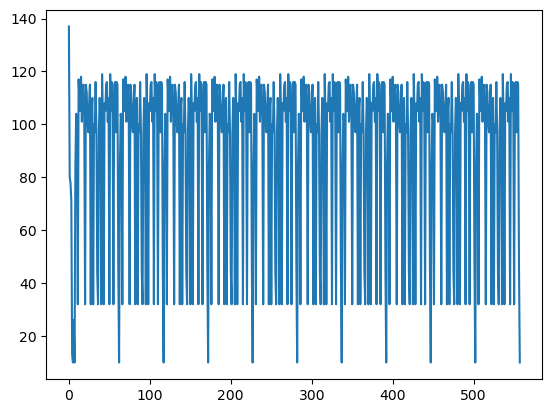

In [14]:
data_ints = [int(dat,2) for dat in data]
plt.plot(data_ints)
plt.show()


In [15]:
''.join([chr(data_i) for data_i in data_ints])

'\x89PNG\r\n\x1a\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\nThe universe speaks in data, and we listen with stats.\n'

In [16]:
data = read_raw_binary_bit("assignment/out/main.pdf", bitsize=8)
print(len(data), "bitchunk total")

141542 bitchunk total


In [17]:
with open("assignment/out/main.pdf", 'rb') as f:
    data = f.read(4)

data

b'%PDF'